# Early Fusion Transformer Model - CMU-MOSEI Dataset

## Importing Libraries

In [1]:
!git clone https://github.com/M-Jafarkhani/Multimodal-Emotion-Recognition

Cloning into 'Multimodal-Emotion-Recognition'...
remote: Enumerating objects: 439, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 439 (delta 27), reused 68 (delta 18), pack-reused 347 (from 1)
Receiving objects: 100% (439/439), 295.19 MiB | 15.87 MiB/s, done.
Resolving deltas: 100% (211/211), done.
Updating files: 100% (71/71), done.


In [2]:
import gdown

file_id = "180l4pN6XAv8-OAYQ6OrMheFUMwtqUWbz"
destination = "mosei_senti_data.pkl"

gdown.download(
    f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=180l4pN6XAv8-OAYQ6OrMheFUMwtqUWbz
From (redirected): https://drive.google.com/uc?id=180l4pN6XAv8-OAYQ6OrMheFUMwtqUWbz&confirm=t&uuid=62a553a7-5659-4fba-8793-25272992bd75
To: /content/mosei_senti_data.pkl
100%|██████████| 3.73G/3.73G [01:08<00:00, 54.7MB/s]


'mosei_senti_data.pkl'

In [3]:
import sys
import torch
import matplotlib.pyplot as plt

sys.path.append('/content/Multimodal-Emotion-Recognition/src')

## Importing Helper Functions

In [4]:
from loader import get_dataloader
from unimodals.modules import Transformer, MLP, Sequential, Identity
from training.supervised import train, test
from fusions.modules import ConcatEarly
from utils import get_default_device, save_results

## Loading the Dataset

In [5]:
FILE_PATH = '/content/mosei_senti_data.pkl'
train_data, valid_data, test_data = get_dataloader(FILE_PATH)

In [6]:
device = get_default_device()
print(device)

cuda


## Model Architecture

In [7]:
encoders = [Identity().to(device), Identity().to(device), Identity().to(device)]
head = Sequential(Transformer(409, 300).to(device), MLP(300, 128, 1)).to(device)
fusion = ConcatEarly().to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


## Training

In [12]:
OUTPUT_MODEL_FILE_NAME = "MOSEI_Early_Fusion_Transformer"
train_losses, valid_losses = train(
    encoders,
    fusion,
    head,
    train_data,
    valid_data,
    100,
    task="regression",
    optimtype=torch.optim.AdamW,
    is_packed=True,
    early_stop=False,
    lr=1e-4,
    save=f"/content/{OUTPUT_MODEL_FILE_NAME}.pt",
    weight_decay=0.01,
    objective=torch.nn.L1Loss(),
)


Epoch [1/200]
Train Loss: 0.5854
Valid Loss: 0.6237
Saving Best

Epoch [2/200]
Train Loss: 0.5847
Valid Loss: 0.6438

Epoch [3/200]
Train Loss: 0.5782
Valid Loss: 0.6525

Epoch [4/200]
Train Loss: 0.5734
Valid Loss: 0.6549

Epoch [5/200]
Train Loss: 0.5714
Valid Loss: 0.6354

Epoch [6/200]
Train Loss: 0.5667
Valid Loss: 0.6719

Epoch [7/200]
Train Loss: 0.5657
Valid Loss: 0.6469

Epoch [8/200]
Train Loss: 0.5561
Valid Loss: 0.6281

Epoch [9/200]
Train Loss: 0.5483
Valid Loss: 0.6396

Epoch [10/200]
Train Loss: 0.5441
Valid Loss: 0.6496

Epoch [11/200]
Train Loss: 0.5455
Valid Loss: 0.6294

Epoch [12/200]
Train Loss: 0.5328
Valid Loss: 0.6366

Epoch [13/200]
Train Loss: 0.5331
Valid Loss: 0.6262

Epoch [14/200]
Train Loss: 0.5254
Valid Loss: 0.6330

Epoch [15/200]
Train Loss: 0.5223
Valid Loss: 0.6315

Epoch [16/200]
Train Loss: 0.5184
Valid Loss: 0.6448

Epoch [17/200]
Train Loss: 0.5094
Valid Loss: 0.6212
Saving Best

Epoch [18/200]
Train Loss: 0.5046
Valid Loss: 0.6231

Epoch [19/200

Text(0.5, 1.0, 'Loss vs. No. of epochs')

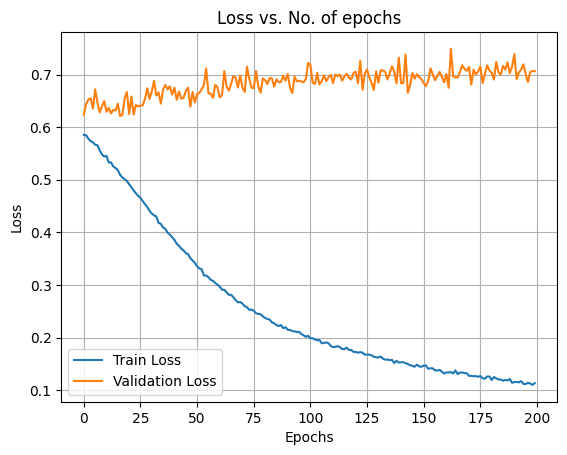

In [13]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [14]:
save_results(train_losses, valid_losses, f'/content/{OUTPUT_MODEL_FILE_NAME}.pkl')

## Testing

In [15]:
model = torch.load(
    f"/content/{OUTPUT_MODEL_FILE_NAME}.pt"
).to(device)

test(
    model,
    test_data,
    is_packed=True,
    criterion=torch.nn.L1Loss(),
    task="posneg-classification"
)


<ipython-input-15-0d0aa0ea88c1>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(


Recall: 76.5193% | Total Accuracy: 71.9147%
Inference Time: 2s138ms
Inference Params: 8129097
